![alt text](Q5.png)

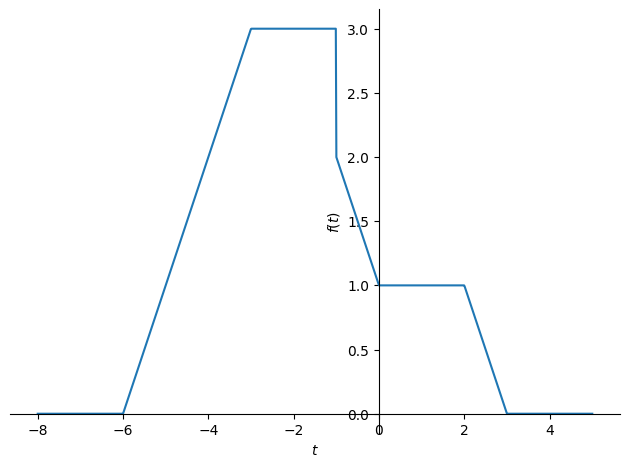

In [1]:
import sympy as sm
## First thing is to replicate the incoming signal
t = sm.Symbol('t')
u = sm.Heaviside
"""
Solving The firat left eqution:
Gradient = (y_2 - y_1)/(x_2-x_1)= 3/3=1, y=x+c
0=-6+c
c=6
-> y=x+6
Graph 2:
m =2-1/(-1)=-1
y = -x+c-> 1=c
y = -x+1
Graph 3:
m = 1/-1=-1
y = -x+c
0=-3+c
c=3
y = -x+3
"""
x = (t+6)*(u(t+6)-u(t+3))+3*(u(t+3)-u(t+1))+(u(t+1)-u(t))*(-t+1)+(u(t)-u(t-2))+(u(t-2)-u(t-3))*(-t+3)
sm.plot(x, (t, -8, 5))

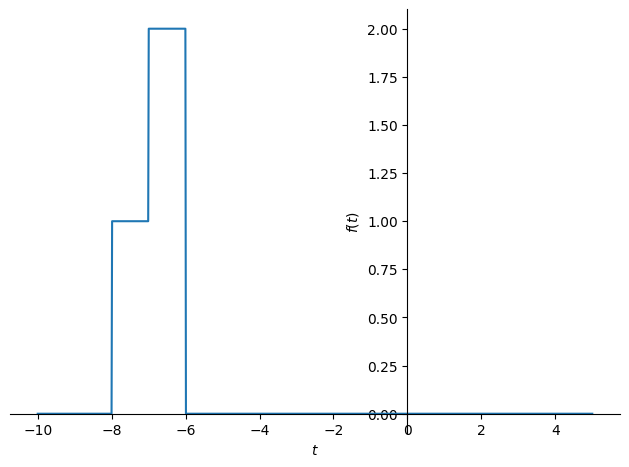

In [17]:
p = 2*(u(t-2)-u(t-3)) +1*(u(t-3)-u(t-4))
l = p.subs(t, -t)
sm.plot(l.subs(t,t+4), (t, -10, 5))

In [18]:
tau = sm.symbols('tau')
m = sm.integrate((x.subs(t,tau)*p.subs(t,t-tau)),(tau,0, 2))

In [19]:
m.subs(t, 2)

0

In [32]:
import numpy as np

c = np.linspace(-10,10)
p_np = 2*(np.heaviside(c-2, 1) - np.heaviside(c-3, 1)) + 1*(np.heaviside(c-3, 1) - np.heaviside(c-4, 1))
x_np = (c+6)*(np.heaviside(c+6, 1)-np.heaviside(c+3, 1))+3*(np.heaviside(c+3, 1)-np.heaviside(c+1, 1))+(np.heaviside(c+1, 1)-np.heaviside(c, 1))*(-c+1)+(np.heaviside(c, 1)-np.heaviside(c-2, 1))+(np.heaviside(c-2, 1)-np.heaviside(c-3, 1))*(-c+3)
y = np.convolve(p_np, x_np,mode = "valid")
# Find the index in c that corresponds to t = 2
index_t_2 = np.where(c >= 2)[0][0]

# Get the convolution value at t = 2
convolution_at_t_2 = y[index_t_2]
print(y)
convolution_at_t_2


IndexError: index 30 is out of bounds for axis 0 with size 1